In [1]:
from all import *

First attempt: ITRE

In [3]:
splitdata = acquireSplitData()
projected_graph = listMEPs()

itre_members = getImportantCommitteeMembers(comm="ITRE")

In [4]:
ourmeps = set(itre_members) & set(projected_graph)

In [5]:
months = []
for month in splitdata:
    nxgraph = nx.from_pandas_edgelist(month, source='AmendmentID', target='MEPName')
    #print(pd.unique(month['MEPName']))
    meps = set(pd.unique(month['MEPName'])) & ourmeps
    #print(nx.algorithms.bipartite.projected_graph(nxgraph, meps).nodes)
    months.append(nx.algorithms.bipartite.projected_graph(nxgraph, meps))

Our measure of cohesiveness will be a percentage of how many edges are present inside the group out of the possible `n choose 2` edges.

In [6]:
# takes long ????

monthly_cohesiveness_by_party = []
for month in months:
    curr = {}
    monthly_meps = set(projected_graph) & set(pd.unique(month.nodes))
    for party in listPoliticalGroups():
        partymeps = set(listMEPs_by_polgroup(party)) & monthly_meps
        curr[party] = cohesiveness(month, partymeps)
    monthly_cohesiveness_by_party.append(curr)
monthly_cohesiveness_by_party = pd.DataFrame(monthly_cohesiveness_by_party)
print(monthly_cohesiveness_by_party)


         EPP       ECR        ID  Greens/EFA        RE       S&D        NI  \
0   0.095238  0.000000  0.192308    0.000000  0.142857  0.600000  0.000000   
1   0.266667  0.500000  1.000000    0.000000  0.214286  0.333333  0.000000   
2   0.076190  0.106061  0.155556    0.000000  0.095385  0.162055  0.100000   
3   0.206154  0.091667  0.091168    0.088889  0.261084  0.240336  0.138889   
4   0.047312  0.142857  0.089744    0.155556  0.069388  0.152157  0.178571   
5   0.032967  0.076923  0.155556    0.090909  0.070076  0.165025  0.333333   
6   0.044297  0.083333  0.116883    0.145455  0.063415  0.097132  0.133333   
7   0.083857  0.073846  0.150000    0.127273  0.081081  0.096894  0.066667   
8   0.062016  0.090909  0.128571    0.035714  0.124731  0.169512  0.083333   
9   0.047849  0.083333  0.086957    0.044444  0.116234  0.086364  0.107143   
10  0.059829  0.082927  0.058030    0.054348  0.101675  0.099790  0.161765   
11  0.078906  0.058480  0.114103    0.055336  0.142807  0.097394

In [15]:
monthly_cohesiveness_by_country = []
for month in months:
    curr = {}
    monthly_meps = set(projected_graph) & set(pd.unique(month.nodes))
    for country in listCountries():
        countrymeps = set(listMEPs_by_country(country)) & monthly_meps
        H = nx.induced_subgraph(month, countrymeps)
        n = H.number_of_nodes()
        e = H.number_of_edges()
        if n in [0,1]:
            curr[country] = 0
        else:
            curr[country] = (2*e)/(n*(n-1)) ## proportion of edges
    monthly_cohesiveness_by_country.append(curr)
monthly_cohesiveness_by_country = pd.DataFrame(monthly_cohesiveness_by_country)
print(monthly_cohesiveness_by_country)

     Czechia    Poland    France  Netherlands  Slovakia   Romania     Spain  \
0   0.000000  0.000000  0.000000     0.000000  0.000000  0.333333  1.000000   
1   0.000000  0.000000  0.000000     0.000000  0.000000  0.666667  0.000000   
2   0.000000  0.109091  0.075758     0.000000  0.000000  0.000000  0.109091   
3   0.000000  0.142857  0.031621     0.100000  0.000000  0.000000  0.072727   
4   0.000000  0.111111  0.028986     0.047619  0.100000  0.000000  0.075000   
5   0.000000  0.111111  0.036765     0.000000  0.000000  0.000000  0.044444   
6   0.000000  0.063158  0.019704     0.027778  0.000000  0.095238  0.058333   
7   0.071429  0.089655  0.022167     0.071429  0.300000  0.209524  0.036765   
8   0.142857  0.000000  0.031579     0.000000  0.200000  0.087912  0.045455   
9   0.000000  0.111111  0.025641     0.000000  0.466667  0.076923  0.057143   
10  0.022222  0.053030  0.022163     0.017544  0.107143  0.090909  0.072939   
11  0.000000  0.021645  0.039394     0.000000  0.138

In [6]:
monthly_cohesiveness_by_party.to_csv("results/monthly_cohesiveness_by_party.csv")
monthly_cohesiveness_by_country.to_csv("results/monthly_cohesiveness_by_country.csv")

TODO: create nice-looking diagrams of this

TODO: do the same analysis on a per country basis

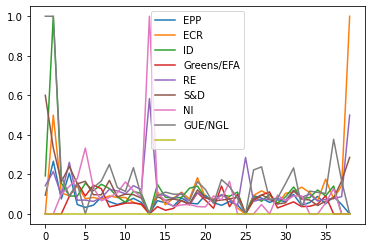

In [7]:
monthly_cohesiveness_by_party.plot()
plt.show()

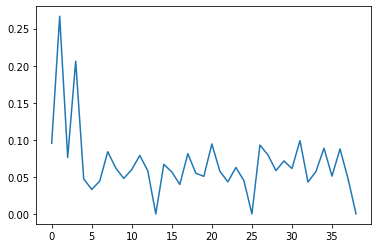

In [8]:
monthly_cohesiveness_by_party["EPP"].plot()
plt.show()

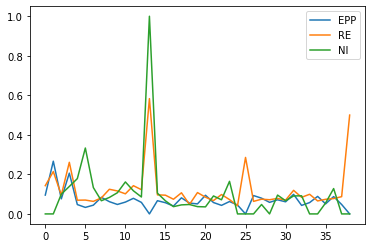

In [9]:
monthly_cohesiveness_by_party[["EPP", "RE", "NI"]].plot()
plt.show()

valami történt 2020 szeptemberben...
meg 2021 augusztusban

In [10]:
my_fav_orgs = getBiggestOrgs()
print(my_fav_orgs)

24    Committee on the Environment, Public Health an...
38                         Committee on Foreign Affairs
21           Committee on Industry, Research and Energy
5     Delegation to the ACP-EU Joint Parliamentary A...
3     Committee on Civil Liberties, Justice and Home...
Name: OrgName, dtype: object


In [11]:
meps = listMEPs()
for i in my_fav_orgs.values:
    for mep in meps:
        org = i
        print(mep, org, isOrgMember(mep, org))

Martina ANDERSON Committee on the Environment, Public Health and Food Safety False
Eric ANDRIEU Committee on the Environment, Public Health and Food Safety True
Margrete AUKEN Committee on the Environment, Public Health and Food Safety True
Catherine BEARDER Committee on the Environment, Public Health and Food Safety False
Mara BIZZOTTO Committee on the Environment, Public Health and Food Safety False
Vilija BLINKEVIČIŪTĖ Committee on the Environment, Public Health and Food Safety False
Biljana BORZAN Committee on the Environment, Public Health and Food Safety True
Udo BULLMANN Committee on the Environment, Public Health and Food Safety False
Cristian-Silviu BUŞOI Committee on the Environment, Public Health and Food Safety True
Martin SCHIRDEWAN Committee on the Environment, Public Health and Food Safety False
Adam BIELAN Committee on the Environment, Public Health and Food Safety False
Izaskun BILBAO BARANDICA Committee on the Environment, Public Health and Food Safety False
Pascal CA